In [49]:
from sampler1 import Sampler_1
from sampler2 import Sampler_2
from sampler3 import Sampler_3

 The idea is to build a strategy to uniformly sample points inside a circle. We are only able to access a uniform sample $U(0,1)$. Let us evaluate different possible strategies. Check out the pdf for more details on the definition of uniform sampling for a circle. We will run the simulations with N = 10000 samples points in a circle of a radius 1.

In [50]:
R = 1
N = 10000

# First Sampler

Let's analyze how the first sampler perform. Sampler 1 operates in polar coordinates uniformly sampling the radius $r$ of uniformly in the interval $(0,R)$.

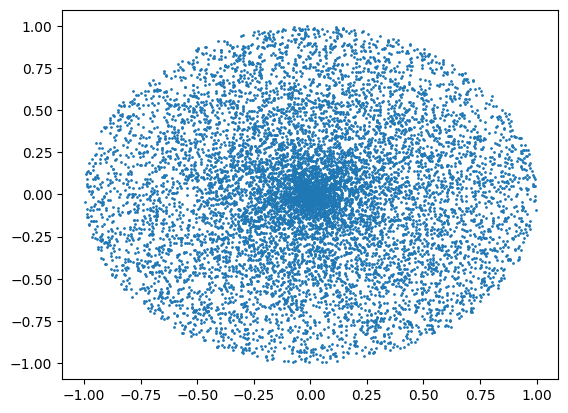

In [51]:
sampler_1 = Sampler_1(R,N)
x_s,y_s = sampler_1.get_samples()
sampler_1.plot()

We can immediately see that the points are not uniformly distributed inside the circle. There is an higher concentration of samples towards the center of the circle. We now validate our impression by computing the fraction of points inside an inner subcircle.

We will first count how many points are inside the subcircle of radius $R_{val}$.

If the sampling is uniform, we expect the ratio of points inside the circle of radius $R_{val}$ to be roughly equal to the ratio of areas ($R_{val }^2 / R^2$).


In [52]:
R_vals = [0.1, 0.25, 0.5, 0.75, 0.9]

for R_val in R_vals:
  count_inner = 0
  #Check how many points are inside the subcircle of radius validation_R 
  for i in range(N):
    if x_s[i]**2 + y_s[i]**2 <= R_val**2 :
      count_inner += 1

  print("For Rval =", R_val,":")
  print("\n")
  print("Ratio of inside points is: ", count_inner / N)
  print("Ratio of areas:", R_val**2 / R**2)
  print("\n")
  print("\n")

For Rval = 0.1 :


Ratio of inside points is:  0.0986
Ratio of areas: 0.010000000000000002




For Rval = 0.25 :


Ratio of inside points is:  0.2475
Ratio of areas: 0.0625




For Rval = 0.5 :


Ratio of inside points is:  0.4908
Ratio of areas: 0.25




For Rval = 0.75 :


Ratio of inside points is:  0.7437
Ratio of areas: 0.5625




For Rval = 0.9 :


Ratio of inside points is:  0.8923
Ratio of areas: 0.81






The points in the inner circle are always more than they should be.
Clearly, the distribution of points is skewed towards the inside of the circle. 

# Second Sampler

Let's analyze how the second sampler perform. Sampler 2 operates in cartesian coordinates. It uniformly samples the $x$ and the $y$ coordinate in the interval $(-R,R)$. A point is discarded if $x^2 + y^2 > R^2. $

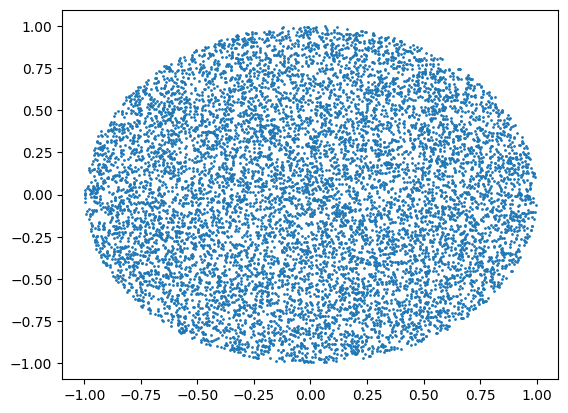

In [53]:
sampler_2 = Sampler_2(R,N)
x_s,y_s = sampler_2.get_samples()
sampler_2.plot()

Now, the points indeed look better spaced and distributed in the circle. Let us validate this statement once again.

In [54]:
R_vals = [0.1, 0.25, 0.5, 0.75, 0.9]

for R_val in R_vals:
  count_inner = 0
  #Check how many points are inside the subcircle of radius validation_R 
  for i in range(N):
    if x_s[i]**2 + y_s[i]**2 <= R_val**2 :
      count_inner += 1

  print("For Rval =", R_val,":")
  print("\n")
  print("Ratio of inside points is: ", count_inner / N)
  print("Ratio of areas:", R_val**2 / R**2)
  print("\n")
  print("\n")

For Rval = 0.1 :


Ratio of inside points is:  0.0124
Ratio of areas: 0.010000000000000002




For Rval = 0.25 :


Ratio of inside points is:  0.0632
Ratio of areas: 0.0625




For Rval = 0.5 :


Ratio of inside points is:  0.2475
Ratio of areas: 0.25




For Rval = 0.75 :


Ratio of inside points is:  0.5635
Ratio of areas: 0.5625




For Rval = 0.9 :


Ratio of inside points is:  0.813
Ratio of areas: 0.81






This time, the ratios are always quite similar, which suggests that we have indeed built a uniform sampler. However, how many samples have we wasted?

In [55]:
wasted_samples = sampler_2.get_count_waste()
print(wasted_samples, "were wasted in the process")

2764 were wasted in the process


To get 10000 inside the circle, we had to sample and waste 2764 extra points outside. We should revisit our economy of sampling :).

# Third Sampler

Sampler 3 works in polar coordinates. If $u$ is the sample provided by our $U(0,1)$ sampler, then the radius $r$ of our point sample is computed as  $r = R \sqrt{u}$. We invite you to check the pdf for the math.

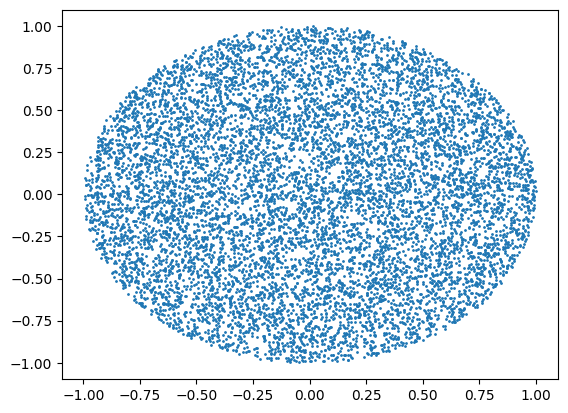

In [56]:
sampler_3 = Sampler_3(R,N)
x_s,y_s = sampler_3.get_samples()
sampler_3.plot()

In [57]:
R_vals = [0.1, 0.25, 0.5, 0.75, 0.9]

for R_val in R_vals:
  count_inner = 0
  #Check how many points are inside the subcircle of radius validation_R 
  for i in range(N):
    if x_s[i]**2 + y_s[i]**2 <= R_val**2 :
      count_inner += 1

  print("For Rval =", R_val,":")
  print("\n")
  print("Ratio of inside points is: ", count_inner / N)
  print("Ratio of areas:", R_val**2 / R**2)
  print("\n")
  print("\n")

For Rval = 0.1 :


Ratio of inside points is:  0.0111
Ratio of areas: 0.010000000000000002




For Rval = 0.25 :


Ratio of inside points is:  0.0623
Ratio of areas: 0.0625




For Rval = 0.5 :


Ratio of inside points is:  0.2491
Ratio of areas: 0.25




For Rval = 0.75 :


Ratio of inside points is:  0.566
Ratio of areas: 0.5625




For Rval = 0.9 :


Ratio of inside points is:  0.8102
Ratio of areas: 0.81






Sampler 3 is clearly the best sample as it manages to achieve a uniform distribution of the points, while not wasting any samples.